# importing needed libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# load the dataset

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

# Preprocessing steps & spliting the datasets 

In [4]:
# Handling missing values
data.fillna(data.median(), inplace=True)

C:\Users\Ahmed Sayed\AppData\Local\Temp\ipykernel_14456\1929393373.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [5]:
# Separating features and target variable
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [6]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Preprocessing: Creating a preprocessing pipeline
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Model 1 Linear Reagression

In [8]:
# Linear Regression Model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)

# Evaluate models
lr_score = lr_pipeline.score(X_test, y_test)
print(f"Linear Regression Score: {lr_score*100}")


Linear Regression Score: 62.54240620553608


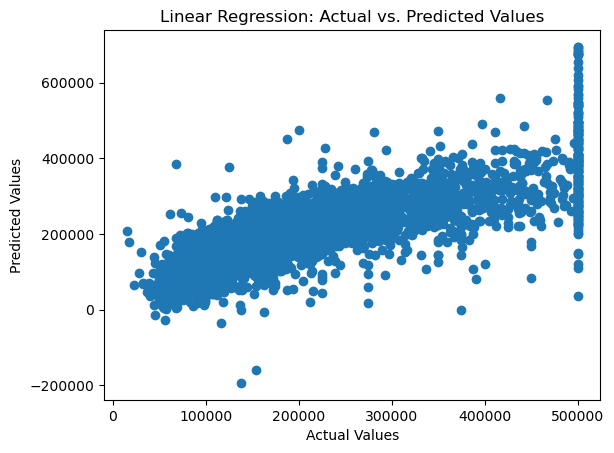

Linear Regression MSE on Test Data: 4908476721.156613
Linear Regression R-squared on Test Data: 0.6254240620553608


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression predictions
lr_predictions = lr_pipeline.predict(X_test)

# Calculating evaluation metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()

print(f"Linear Regression MSE on Test Data: {lr_mse}")
print(f"Linear Regression R-squared on Test Data: {lr_r2}")


# Model 2 KNN  as regressor  

In [10]:
# KNN Regression Model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=5))])  #n_neighbors=5

knn_pipeline.fit(X_train, y_train)

# Evaluate models
knn_score = knn_pipeline.score(X_test, y_test)
print(f"KNN Regression Score: {knn_score*100}")


KNN Regression Score: 71.29917188518262


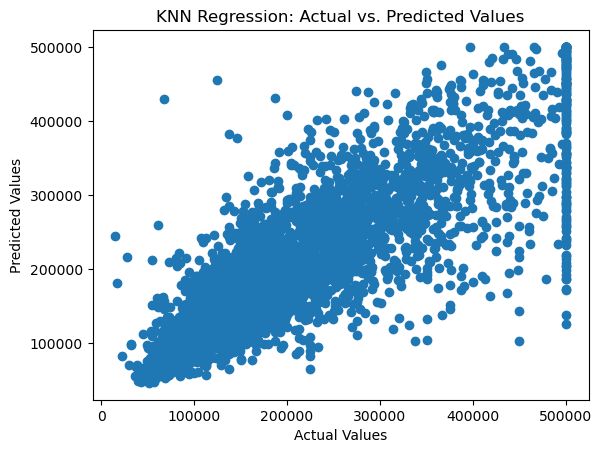

KNN Regression MSE on Test Data: 3760982284.460552
KNN Regression R-squared on Test Data: 0.7129917188518262


In [11]:
# KNN Regression predictions
knn_predictions = knn_pipeline.predict(X_test)

# Calculating evaluation metrics
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.show()

print(f"KNN Regression MSE on Test Data: {knn_mse}")
print(f"KNN Regression R-squared on Test Data: {knn_r2}")


# some helpful cells for documentations 

In [12]:
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in testing set: {len(X_test)}")

Number of samples in training set: 16512
Number of samples in testing set: 4128


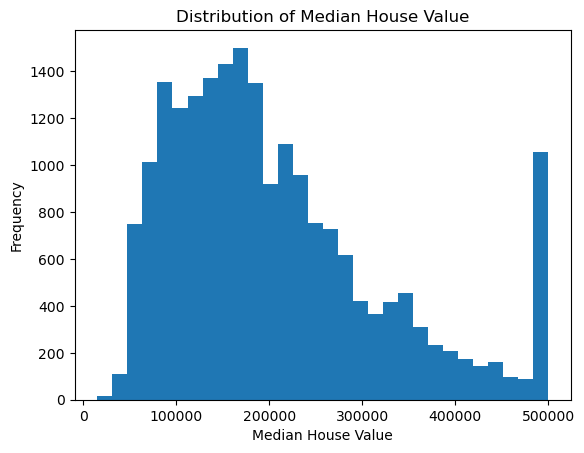

In [14]:
# Check the distribution of the target variable (assuming 'median_house_value')
plt.hist(data['median_house_value'], bins=30)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()



In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'X' contains your feature columns and 'y' contains the target variable

# Column names before preprocessing
original_feature_names = X.columns.tolist()
print("Number of original features:", len(original_feature_names))
print("Original feature names:", original_feature_names)

# Preprocessing steps
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the preprocessing on the data
preprocessed_data = preprocessor.fit_transform(X)

# Get transformed feature names
encoded_categories = preprocessor.named_transformers_['cat'].named_steps['encoder'].categories_
encoded_cat_names = [f'{feature}_{value}' for feature, categories in zip(categorical_features, encoded_categories) for value in categories]

transformed_feature_names = numeric_features + encoded_cat_names

print("Number of transformed features:", preprocessed_data.shape[1])
print("Transformed feature names:", transformed_feature_names)


Number of original features: 9
Original feature names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
Number of transformed features: 13
Transformed feature names: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [17]:
print("Dimensions of preprocessed data:", preprocessed_data.shape)


Dimensions of preprocessed data: (20640, 13)
